In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [0]:
#!pip install bbknn==1.3.6
#pip install umap-learn==0.3.9

In [0]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.5 scipy==1.4.1 pandas==1.0.4 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

In [0]:
adata= sc.read_h5ad("hypothalamic_no_regression.h5ad")

In [0]:
adata

AnnData object with n_obs × n_vars = 19182 × 4771
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [0]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [0]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


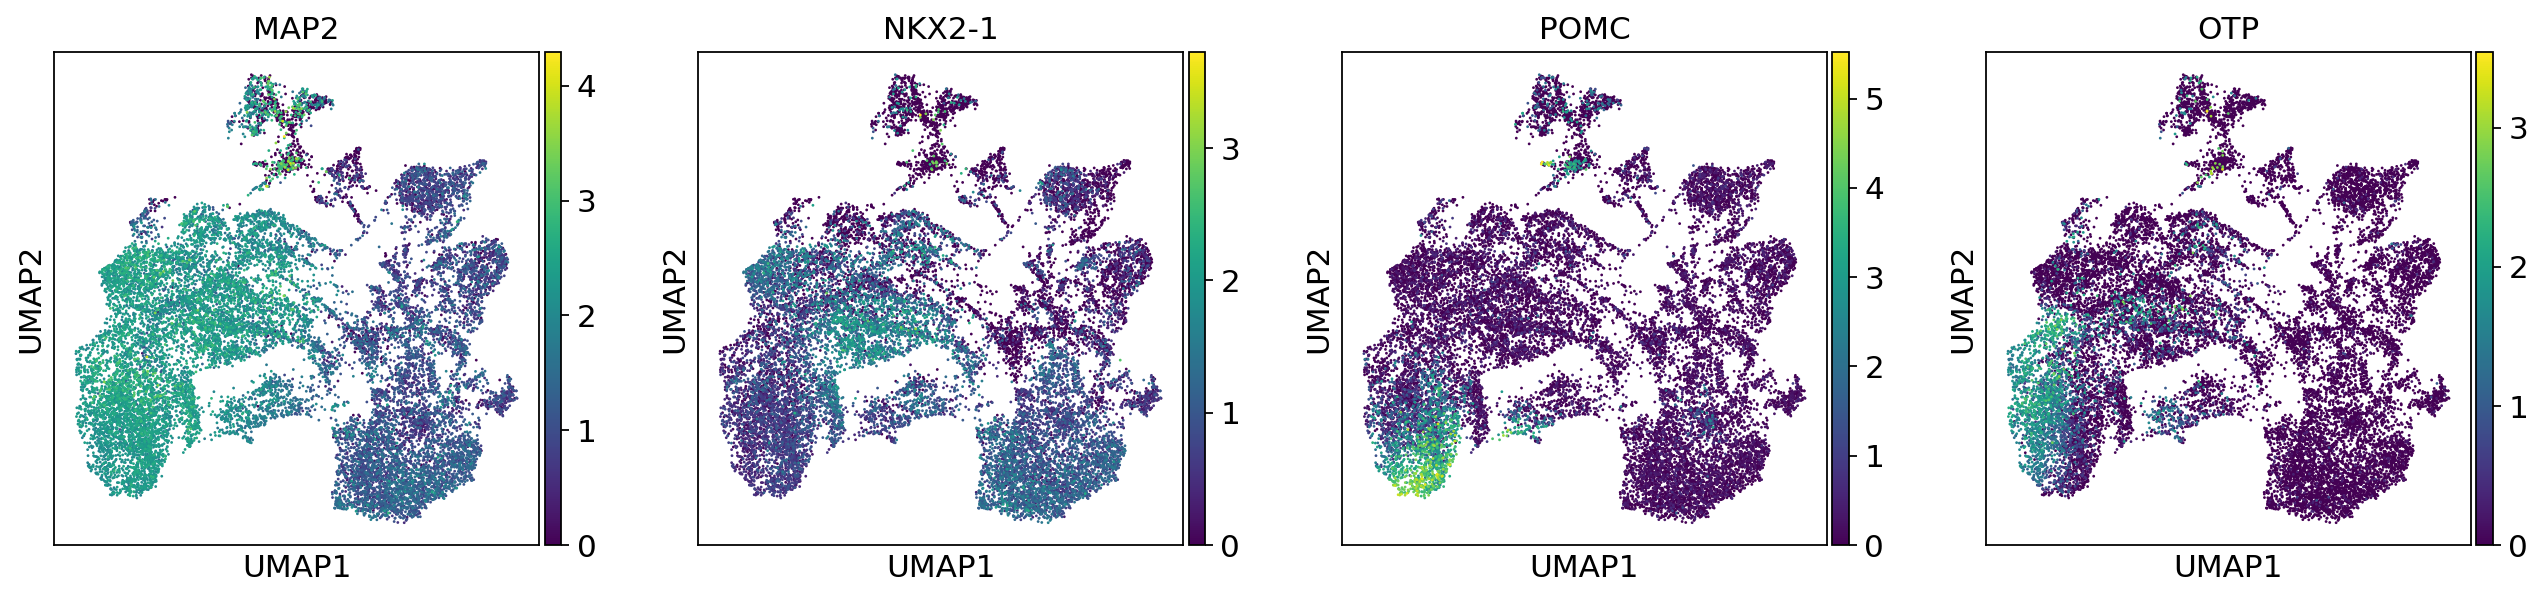

In [0]:
sc.pl.umap(adata, color=["MAP2", "NKX2-1", "POMC", "OTP"])

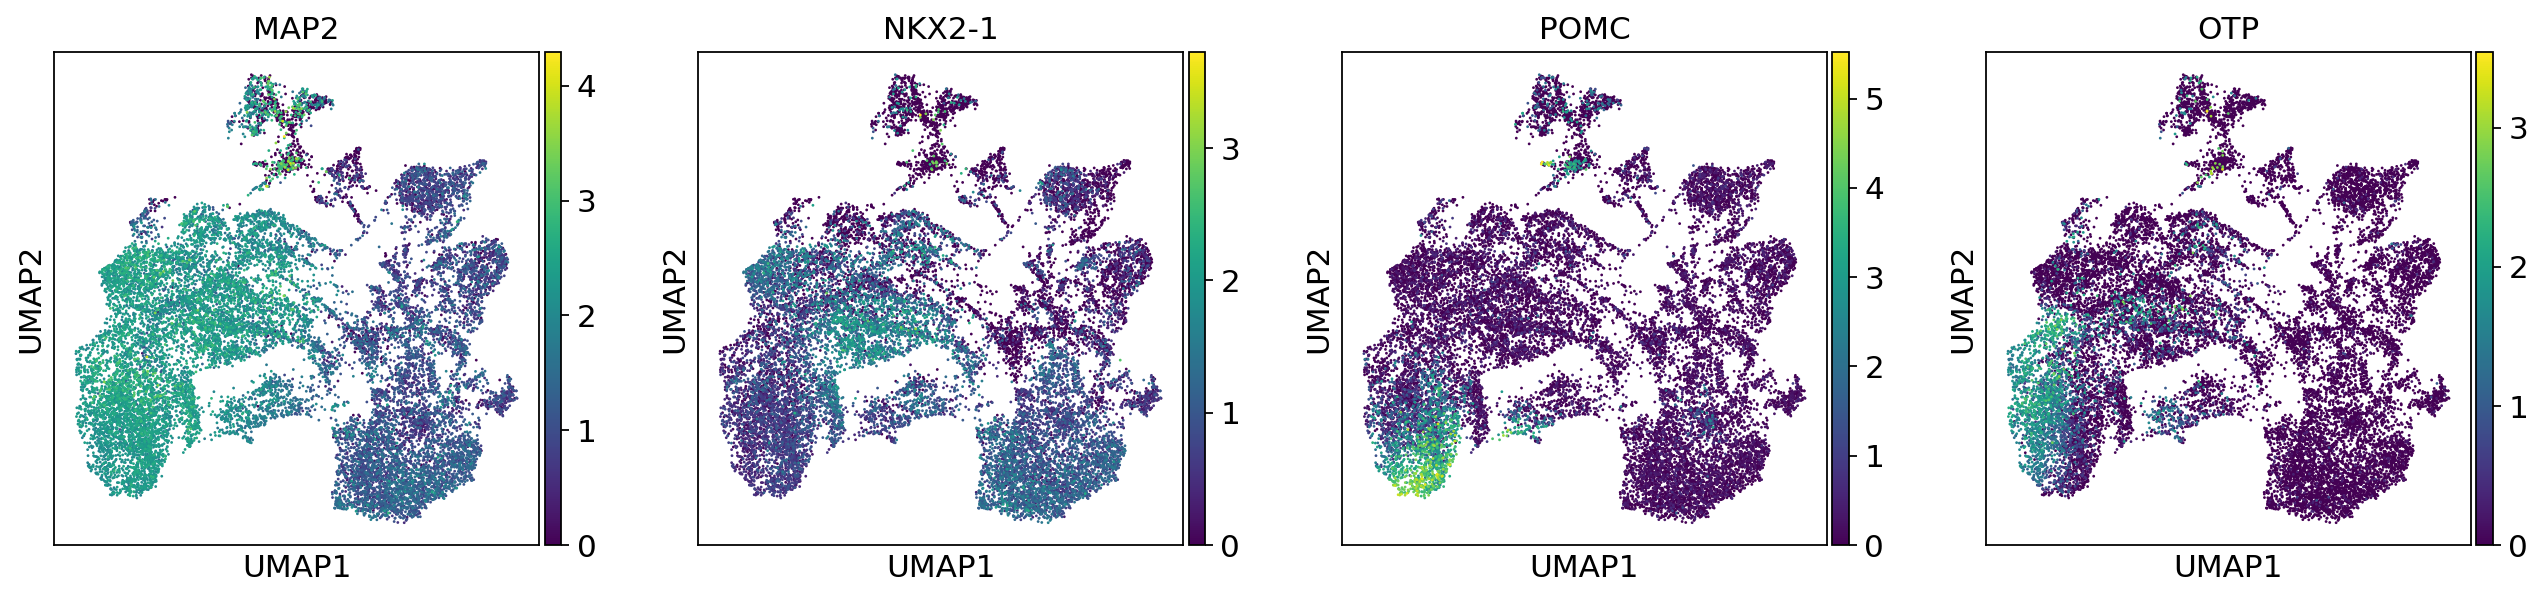

In [0]:
# no difference compared to the above figure, because i didn't using linear regression to do regressionout in the preprocessing, although I did scaling
sc.pl.umap(adata, color=["MAP2", "NKX2-1", "POMC", "OTP"], use_raw=True)

## Check the clustering

In [0]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


In [0]:
sc.tl.leiden(adata, resolution=0.6, key_added="leiden_0.6")

running Leiden clustering
    finished: found 22 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:04)


In [0]:
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_0.4")

running Leiden clustering
    finished: found 16 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:04)


In [0]:
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_0.2")
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_0.1")


running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:03)


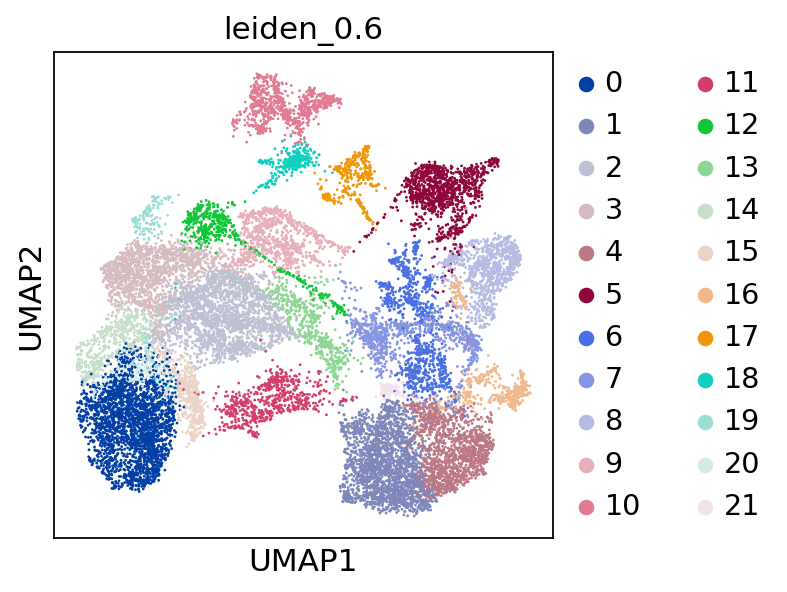

In [0]:
sc.pl.umap(adata, color="leiden_0.6")

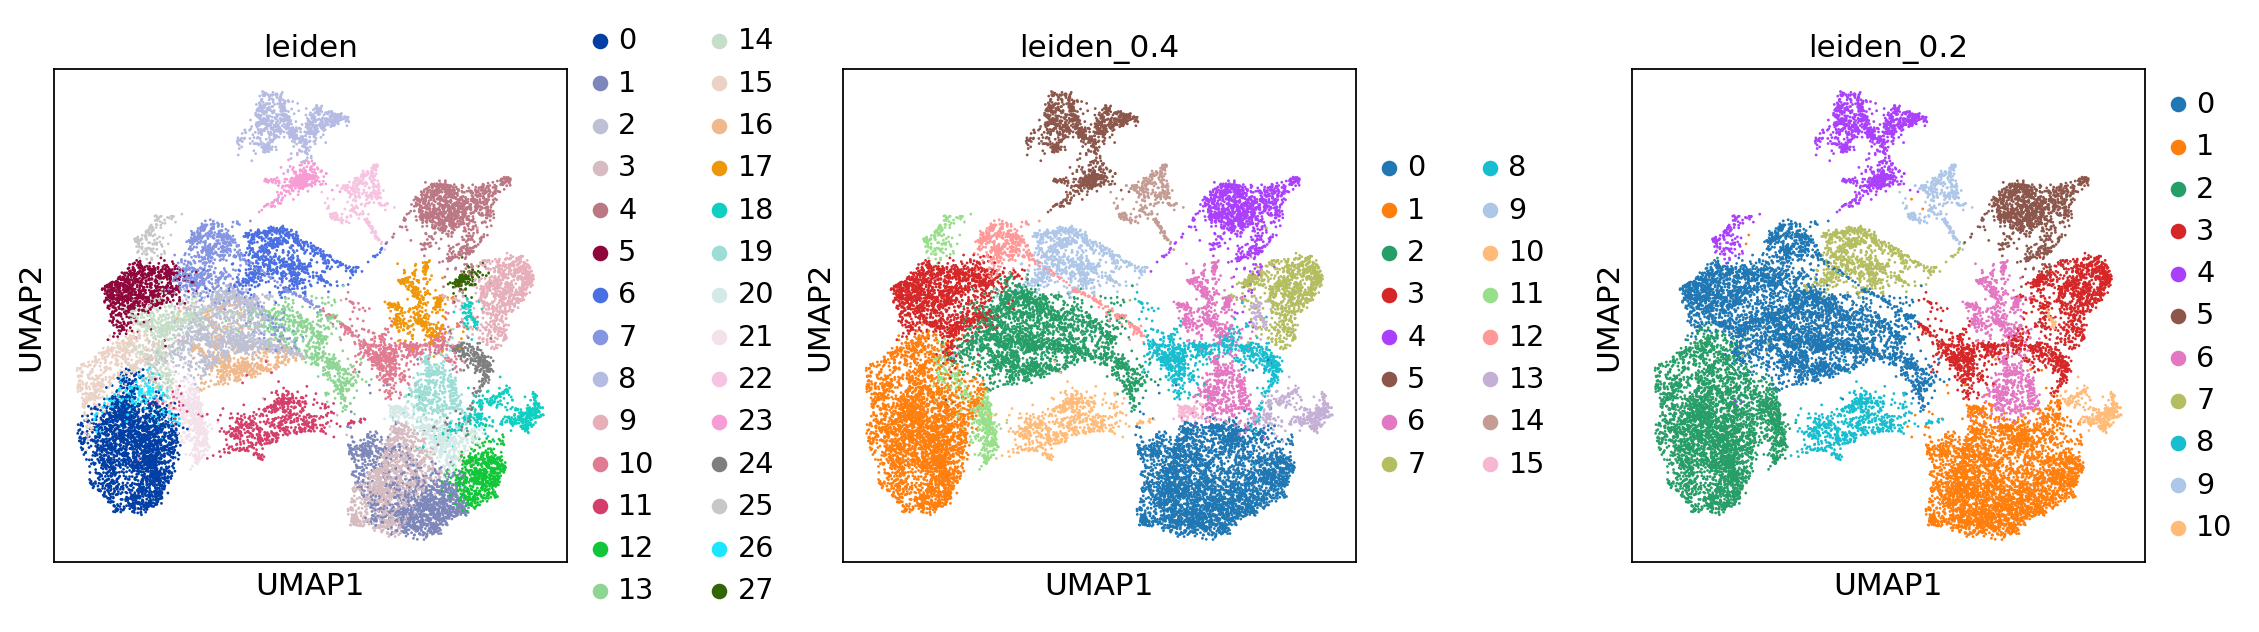

In [0]:
sc.pl.umap(adata, color=["leiden", "leiden_0.4", "leiden_0.2"], wspace=0.4, save="_hypthalamic")